<a href="https://colab.research.google.com/github/junheecho-zz/play2021/blob/master/dataset_muscat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DuckDuckGo

Alternatively, you can use [DuckDuckGo](https://duckduckgo.com/) instead of Bing. DuckDuckGo is a "privacy first" search service, with many useful features. However, they do not have an official API, so the function we'll show here relies on the particular structure of their web interface, which may change.

To use DuckDuckGo to download images, use the `search_images_ddg` function from `fastbook`, like so:

## Reference
1. https://colab.research.google.com/github/fastai/course20/blob/master/images.ipynb

In [ ]:
!pip install -q fastbook

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Configurable parameters

In [ ]:
# how many images for each category. 
# it should be less than 1000. limited by search_images_ddg API.
max_images = 300

# save root directory
root_dir = f'grape-dataset/images_{max_images}'

# 16 types of grapes
# https://www.healthline.com/nutrition/types-of-grapes
# categories. (class name, search keyword)
categories = [
    ('concord grape', 'concord grape'),             # 일반포도?
    ('crimson grape', 'crimson grape'),             # 적포도?
    ('thompson seedless grape', 'thompson seedless grape'),       # 청포도?
    ('shine muscat grape', 'shine muscat grape')    # 샤인 머스캣
]

In [ ]:
#!mkdir drive/MyDrive/w2/grape-type
#!cp images_300.tar.gz drive/MyDrive/w2/grape-type

In [ ]:
#!cd drive/MyDrive/w2/grape-type && tar xvfz images_300.tar.gz

In [ ]:
#!cp images_300_v1.tar.gz drive/MyDrive/w2/grape-type/

### Download images

In [ ]:
from fastbook import *

# return {'class': [image_path]}
def download_images(root_dir, categories, max_images):
  result = {}
  for category,search in categories:
    urls = search_images_ddg(search, max_images=max_images)
    for i, url in enumerate(urls):
      dest = f'{root_dir}/{category}/{i:04}.jpg'
      #print (dest)
      try:
        download_url(url, dest)
        result[category] = result.get(category, []) + [dest]
        
      except Exception as ex:
        print (ex)
        print ('Fail to download', url)
        continue
  return result

downloaded = download_images(root_dir, categories, max_images)
#downloaded = download_images('/content/drive/MyDrive/w2/design-style/images_10', categories, 10)
for category in downloaded:
  print (f'{category}: {len(downloaded[category])}')

HTTP Error 403: Forbidden
Fail to download https://www.tereandjuancarlosproduce.com/wp-content/uploads/2018/09/grapes.jpg


<urlopen error [Errno 104] Connection reset by peer>
Fail to download https://floridalandscapedoctor.com/wp-content/uploads/2017/03/slow_release_nitrogen.jpg


<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1091)>
Fail to download https://www.willisorchards.com/system/products/images/240/original/thompson_bunch_grape_vine-image2.jpg?1370582466


HTTP Error 404: Not Found
Fail to download https://img.mauritius.sodatech.com/dsf/preview_watermarked/ME-PI-2887585/save_as_name/mauritius%20images%20-%2002563531.jpg
<urlopen error [Errno 110] Connection timed out>
Fail to download https://plantspk.com/wp-content/uploads/2014/06/huh.jpg


HTTP Error 404: Not Found
Fail to download http://ucanr.edu/datastoreFiles/436-4.jpg


HTTP Error 404: Not Found
Fail to download https://cdn.shopify.com/s/files/1/2154/4937/products/cottoncandygraes3_d6a3be23-1453-44dd-b7b5-f0c3eabeb493_2000x.jpg?v=1615470997


HTTP Error 404: Not Found
Fail to download https://www.elginnursery.com/wp/wp-content/uploads/Grapes-Thompson-e1595121269257.jpg


HTTP Error 404: Not Found
Fail to download http://media.gettyimages.com/photos/thompson-seedless-grapes-on-grapevine-picture-id530637996?s=170667a


thompson seedless grape: 317


In [ ]:
src = 'grape-dataset/images_300/'
src_file = 'images_300.tar.gz'
dest = 'drive/MyDrive/w2/grape-type' 
!tar cvfz {src_file} {src}
!cp {src_file} {dest}
!cd {dest} && tar xvfz {src_file}

In [ ]:
dest = 'drive/MyDrive/w2/grape-type' 
!cd {dest}
!tar cvfz images_300_v1.tar.gz grape-dataset/images_300/

### view downloaded images

NOTE: Several images are deleted manually after downloading

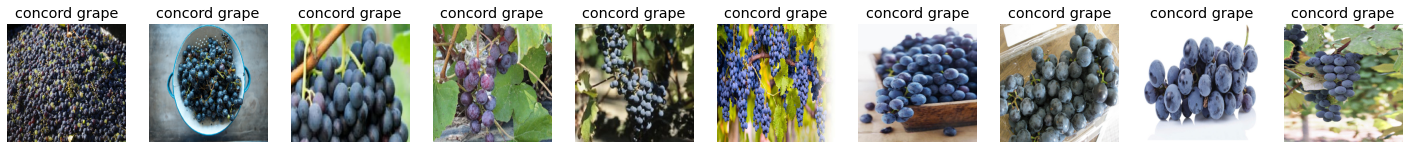

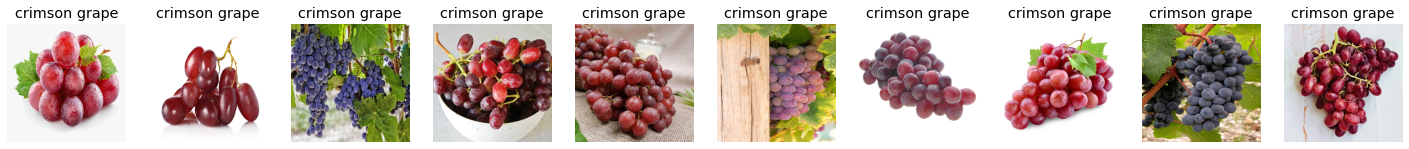

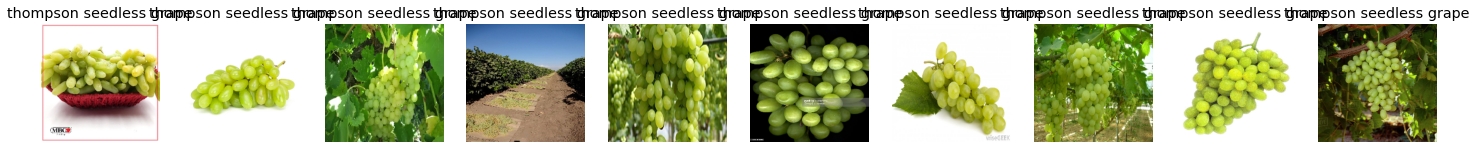

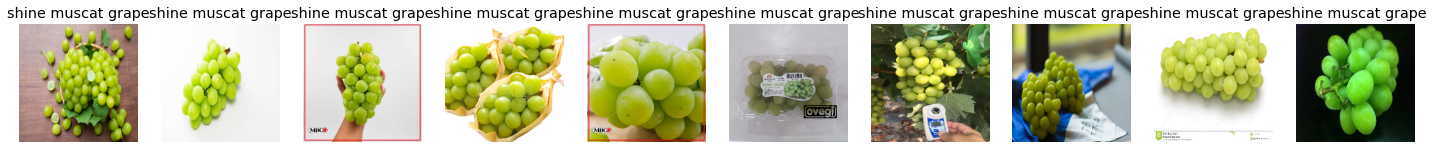

In [31]:
import glob, os
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

## visualize some images / labels
def plot_dataset_samples(classes, root_dir=root_dir, samples=10, extension='jpg', W=256, H=256):
  for target_cls in classes:
      n_cols = 10 # # of sample plot
      fig, axs = plt.subplots(ncols=n_cols, figsize=(25, 3))

      target_directory = os.path.join(root_dir, target_cls)
      image_files = [os.path.join(target_directory, file) for file in os.listdir(target_directory) if extension in file][:n_cols]
  
      for i, image_file in enumerate(image_files):
          img = load_img(image_file, target_size=(W, H))
          img = img_to_array(img)
  
          axs[i].imshow(np.uint8(img))
          axs[i].axis('off')
          axs[i].set_title(target_cls)
  
      plt.show()

classes = [category for category, search_keyword in categories]
root_dir = '/content/drive/MyDrive/w2/grape-type/grape-dataset/images_300'
plot_dataset_samples(classes=classes, root_dir=root_dir)